<a href="https://colab.research.google.com/github/ElisaSuarez/czechitas-section3/blob/main/czechitas_season1_episode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipympl
!pip install mpl_interactions
!pip install celluloid

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

In [2]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

# Error and Accuracy in Single Layer Perceptron

Let's start by creating some interesting data

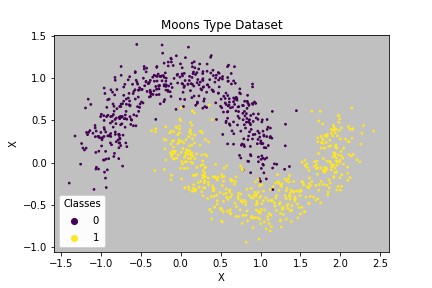

In [5]:
xy,l = datasets.make_moons(
    n_samples=1000,
    noise=0.16
) # xy coordinates, and labels

fig, ax = plt.subplots(1,1)
scatter = plt.scatter(xy[:,0],xy[:,1],3,l)

legend1 = ax.legend(
    *scatter.legend_elements(),
    loc="lower left", title="Classes")
ax.add_artist(legend1)

ax.set_title('Moons Type Dataset')
ax.set_xlabel('X')
ax.set_ylabel('X')
ax.set_facecolor('silver')

plt.show()

And now, let's see how the parameters change accuracy and error from

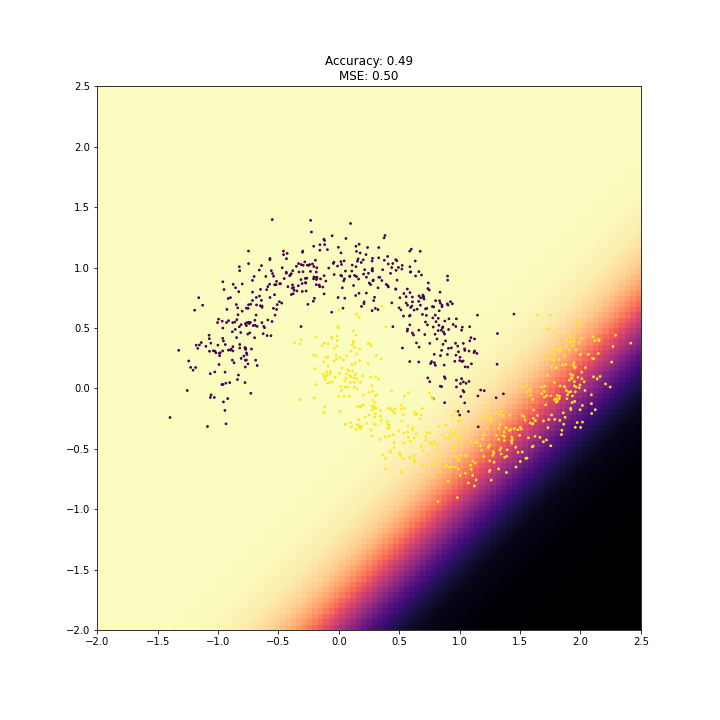

In [7]:
def accuracy(p,t):
    return (p==t).sum()/len(p)
def mse(p,t):
    return ((p-t)**2).sum()/len(p)

def title_f(w1,w2,b):
    o = NN(xy[:,0],xy[:,1],w1,w2,b)
    acc = accuracy(o>=0.5, l==1)
    err = mse(o,l)
    return 'Accuracy: {acc:.2f}\nMSE: {err:.2f}'.format(acc=acc,err=err)

def NN(x,y,w1,w2,b):
    return 1/(1+np.exp(-(w1*x +w2*y) + b))

x = np.linspace(-2, 2.5, 101)
y = np.linspace(-2, 2.5, 101)
X,Y = np.meshgrid(x,y)
w1 = np.linspace(-4, 4, 101)
w2 = np.linspace(-4, 4, 101)
b = np.linspace(-10, 10, 101)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xy[:,0],xy[:,1],3,l)
controls = iplt.imshow(lambda p1,p2,p3: NN(X,Y,p1,p2,p3), 
                       p1=w1, p2=w2, p3=b,
                       extent=[-2,2.5,-2,2.5],
                       autoscale_cmap=False,
                       cmap='magma',
                       **{'vmin':0, 'vmax':1}
                      )
with controls:
    iplt.title(lambda p1,p2,p3: title_f(p1,p2,p3))

plt.show()

And now we'll look at how the error function looks like

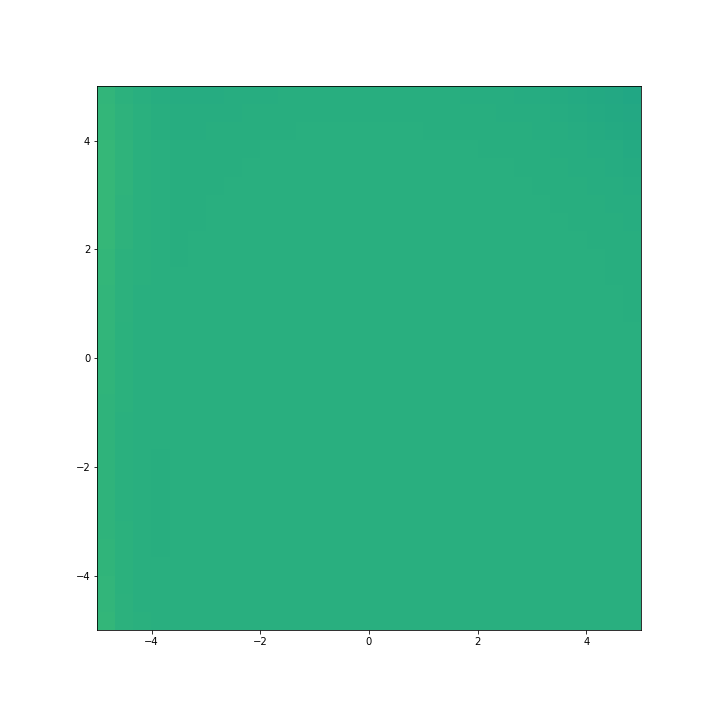

In [9]:
w1 = np.linspace(-5,5,30)
w2 = np.linspace(-5,5,30)
b = np.linspace(-10,10,30)
W1,W2,B = np.meshgrid(w1,w2,b)
W1 = W1.reshape(30,30,30,1)
W2 = W2.reshape(30,30,30,1)
B = B.reshape(30,30,30,1)

temp = xy.reshape(1,1,1,-1,2)
O = 1/(1+np.exp(-(W1*temp[:,:,:,:,0]) - (W2*temp[:,:,:,:,1]) + B))

ll = ((0.8*l)+0.1).reshape(1,1,1,-1)
O = ((O-ll)**2).sum(axis=3) / 1000

b_dict = {v:i for i,v in enumerate(b)}
def get_plane(b):
    return O[:,:,b_dict[b]]
    
fig, ax = plt.subplots(figsize=(10,10))
controls = iplt.imshow(get_plane,
                       b=b,
                       autoscale_cmap=False,
                       extent=[w1[0],w1[-1],w2[0],w2[-1]],
                       play_buttons=True,
                       **{'vmin':O.min(), 'vmax':O.max()})
#iplt.plot(x, f2, controls=controls, label="f2")
plt.show()